In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
from numpy.fft import *
warnings.filterwarnings('ignore')

### Squarewave FS

In [61]:
def squarewave_fs(N,f,nk):
    t = np.linspace(0,2*np.pi,N)
    xk = np.empty((0,0))
    xs = np.zeros((1,N))
    ys = np.empty((0,N))
    for k in range(1,nk,2):
        x = np.sin(f*k*t)
        xs = xs+x/k
        xk = np.append(xk,x)
        ys = np.append(ys,xs,0)
    return xs,ys

In [62]:
N = 5
nk = 10
f = 60
xs,ys = squarewave_fs(N,f,nk)
print("xs: ",xs)
print("ys: ",ys)

xs:  [[ 0.00000000e+00 -2.33998934e-14 -4.67997868e-14 -7.33576480e-14
  -9.35995737e-14]]
ys:  [[ 0.00000000e+00 -1.07793678e-14 -2.15587355e-14 -3.91639383e-15
  -4.31174710e-14]
 [ 0.00000000e+00 -1.20848324e-14 -2.41696647e-14 -2.67805940e-14
  -4.83393295e-14]
 [ 0.00000000e+00 -1.71798582e-14 -3.43597165e-14 -4.20656716e-14
  -6.87194329e-14]
 [ 0.00000000e+00 -1.57784934e-14 -3.15569868e-14 -3.78615770e-14
  -6.31139735e-14]
 [ 0.00000000e+00 -2.33998934e-14 -4.67997868e-14 -7.33576480e-14
  -9.35995737e-14]]


### Test FS

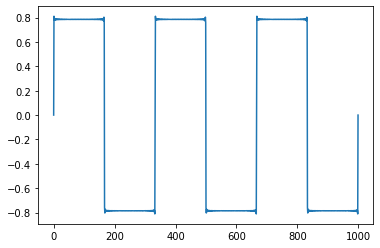

In [63]:
N=1000
f=3
nk=800
xs, ys = squarewave_fs(N, f, nk);
plt.plot(xs[0]);
plt.show()

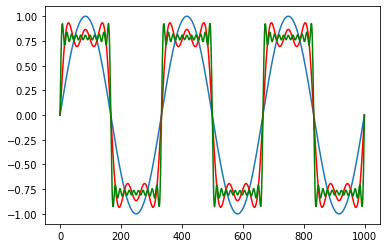

In [64]:
plt.plot(ys[0,:])
plt.plot(ys[2,:],'r')
plt.plot(ys[10,:],'g');

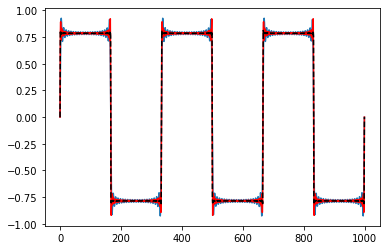

In [65]:
plt.plot(ys[20,:]);
plt.plot(ys[50,:],'r');
plt.plot(ys[399,:],'k--');

### FFT2 BW Square

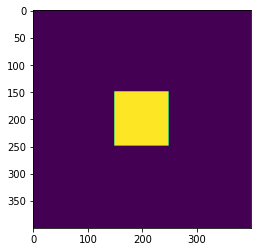

In [66]:
N = 400
a = np.zeros((N,N))
a[149:249,149:249]=255
plt.imshow(a)

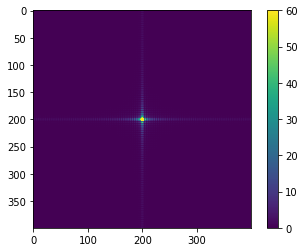

In [67]:
f = fft2(a)
f = fftshift(f)
plt.imshow(np.abs(f)*1e-4,vmin=0, vmax=60)
plt.colorbar()

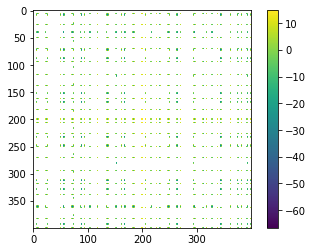

In [68]:
plt.imshow(np.log(np.abs(f)))
plt.colorbar()

### FFT2 direction

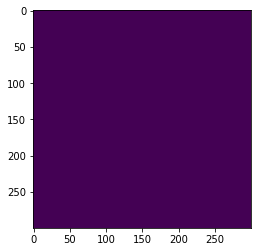

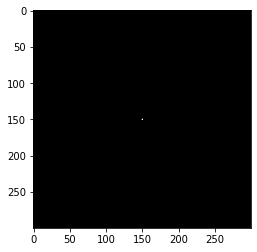

In [119]:
n = 300
h1 = np.zeros((n,n))+1
f1 = np.fft.fftshift(np.fft.fft2(h1))
plt.imshow(np.abs(f1)*1e-4,cmap='Greys_r',vmin=0, vmax=1)
plt.show()

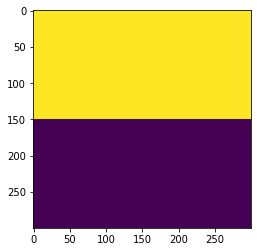

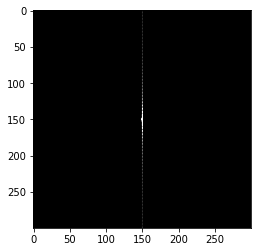

In [70]:
n = 300
h0 = np.zeros((n,n))
h0[0:int(n/2),:]=1
f0 = np.fft.fftshift(np.fft.fft2(h0))
plt.imshow(np.abs(f0)*1e-3,cmap='Greys_r',vmin=0, vmax=1)
plt.show()

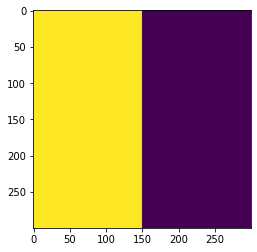

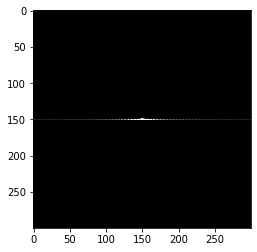

In [118]:
v0 = np.zeros((n,n))
v0[:,0:int(n/2)]=1
f0v = np.fft.fftshift(np.fft.fft2(v0))
plt.imshow(np.abs(f0v)*1e-3,cmap='Greys_r',vmin=0, vmax=1)
plt.show()

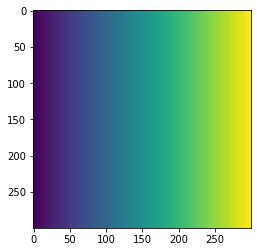

In [72]:
p1 = np.linspace(-n/2,n/2,n).reshape(1,300)
k1,k2 = np.meshgrid(p1,p1)
plt.imshow(k1)

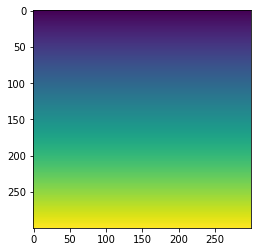

In [73]:
plt.imshow(k2)

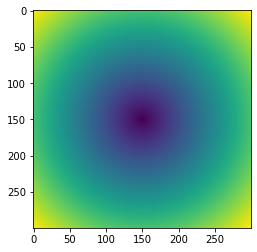

In [74]:
r = np.sqrt(np.power(k1,2) + np.power(k2,2))
plt.imshow(r)

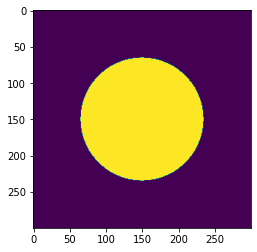

In [120]:
th1 = 0.4*np.max(r[:]);
th2 = 0.2*np.max(r[:]);

z1 = np.zeros((n,n))
z1[r<th1] = 1
plt.imshow(z1)
fz1 = fftshift(fft2(z1))

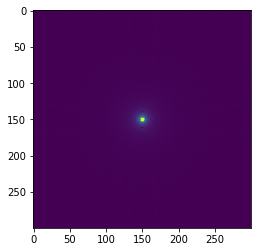

In [121]:
plt.imshow(abs(fz1)*1e-3,vmin=0, vmax=3)

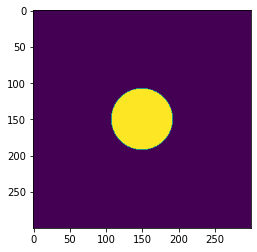

In [77]:
z2 = np.zeros((n,n));
z2[r<th2] = 1;
fz2 = fftshift(fft2(z2))
plt.imshow(z2)

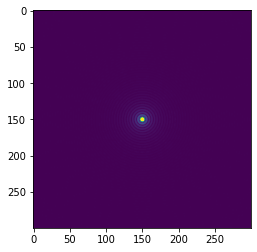

In [78]:
plt.imshow(abs(fz2)*1e-3,vmin=0, vmax=3);

### FT Disp

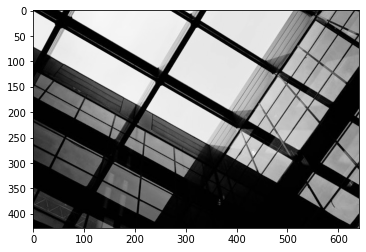

In [79]:
x = mpimg.imread('bwbldg.jpeg')
# rgb2gray = 0.2989R+0.5870G+0.1140B
x = np.dot(x,[0.2989, 0.5870, 0.1140])
plt.imshow(x,cmap='Greys_r');

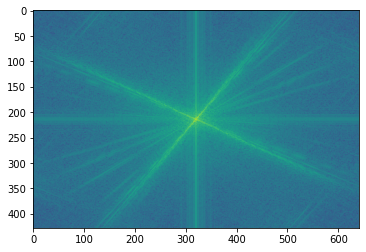

In [80]:
f = fftshift(fft2(x))
plt.imshow(np.log(np.abs(f))/60)

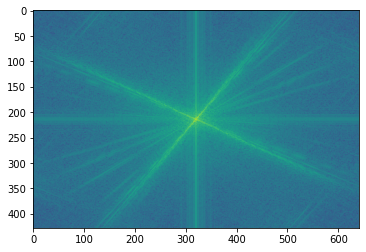

In [81]:
plt.imshow(np.log(np.abs(f)));

### FT Distributivity

In [82]:
#load images and reshape them to same size
x1 = np.dot(mpimg.imread('lens.jpg')[:426,:],[0.2989, 0.5870, 0.1140])
x2 = np.dot(mpimg.imread('triangle.jpeg')[:,:600],[0.2989, 0.5870, 0.1140])
n1,n2 = x1.shape

f1 = fftshift(fft2(x1))
f2 = fftshift(fft2(x2))

f12s = fftshift(fft2(x1+x2))

f12 = f1+f2

x12s = ifft2(f12s)
x12 = ifft2(f12)

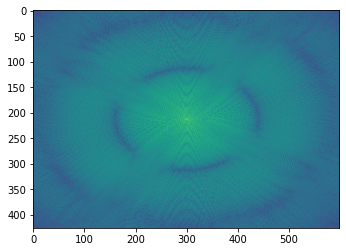

In [83]:
plt.imshow(np.log(np.abs(f1)))

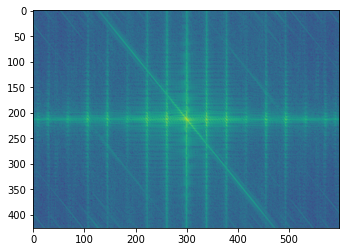

In [84]:
plt.imshow(np.log(np.abs(f2)))

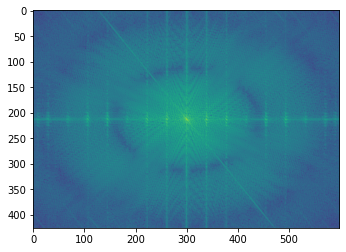

In [85]:
plt.imshow(np.log(np.abs(f12)))

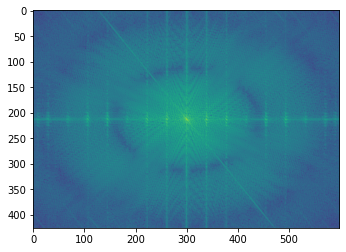

In [86]:
plt.imshow(np.log(np.abs(f12s)))

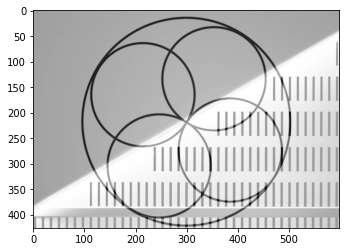

In [87]:
plt.imshow(np.abs(x12),'Greys_r')

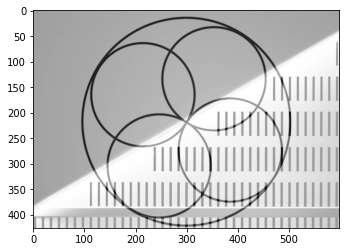

In [88]:
plt.imshow(np.abs(x12s),'Greys_r')

### FT scaling

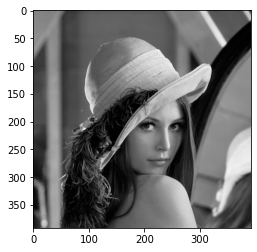

In [89]:
x = np.dot(mpimg.imread('lena.jpg'),[0.2989, 0.5870, 0.1140])
a = 5
y = a*x
plt.imshow(x,'Greys_r',vmin=0, vmax=255);

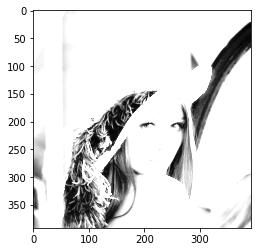

In [90]:
plt.imshow(y,'Greys_r',vmin=0, vmax=255);

In [91]:
f = fftshift(fft2(x))
fa = fftshift(fft2(y))

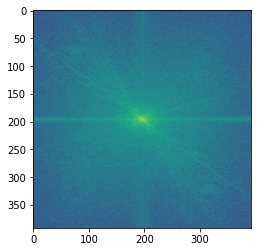

In [92]:
plt.imshow(np.log(np.abs(f)))

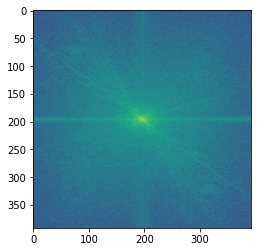

In [93]:
plt.imshow(np.log(np.abs(fa)))

### FT shift sq

array([[ 0.6705212 , -0.6705212 ,  0.67836355, ..., -0.65483649,
         0.65483649, -0.65483649],
       [-0.67836355,  0.6705212 , -0.67836355, ...,  0.65483649,
        -0.66267884,  0.65483649],
       [ 0.67836355, -0.67836355,  0.67836355, ..., -0.65483649,
         0.65483649, -0.65483649],
       ...,
       [-0.55288591,  0.55288591, -0.55288591, ...,  0.55288591,
        -0.51367415,  0.51367415],
       [ 0.54504356, -0.54504356,  0.54504356, ..., -0.56072826,
         0.5215165 , -0.5215165 ],
       [-0.56072826,  0.56072826, -0.55288591, ...,  0.5372012 ,
        -0.51367415,  0.51367415]])

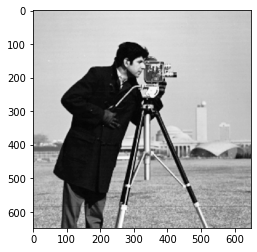

In [94]:
a1 = np.dot(mpimg.imread('cameraman.jpg'),[0.2989, 0.5870, 0.1140,0])
plt.imshow(a1,'Greys_r')

n1 = a1.shape[0]
n2 = a1.shape[1]

x = np.meshgrid(np.linspace(1,n1,n1),np.linspace(1,n1,n1))
y = np.meshgrid(np.linspace(1,n2,n2),np.linspace(1,n2,n2))

mat1 = np.power(-1,x)
mat1 = mat1*(np.power(-1,y))

y,x = np.meshgrid(np.linspace(1,n2,n2),np.linspace(1,n1,n1))
mat1 = np.power(-1,x+y)
q1 = np.multiply(a1,mat1)
q1

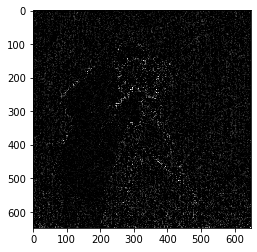

In [95]:
plt.imshow(q1*255e2,'Greys_r',vmin=0, vmax=255)

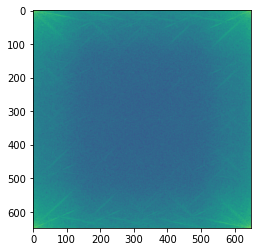

In [96]:
plt.imshow(np.log(np.abs(fft2(a1))))

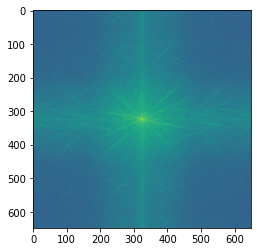

In [97]:
plt.imshow(np.log(np.abs(fft2(q1))))

### Ft complexconj mag

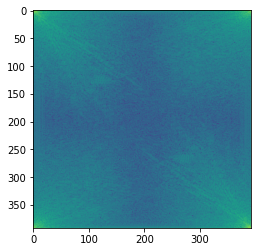

In [98]:
x = np.dot(mpimg.imread('lena.jpg'),[0.2989, 0.5870, 0.1140])
n1,n2 = x.shape
f = fft2(x)
fc = np.conj(f)

plt.imshow(np.log(np.abs(f)))

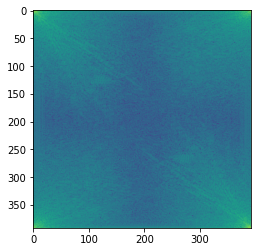

In [99]:
plt.imshow(np.log(np.abs(fc)))

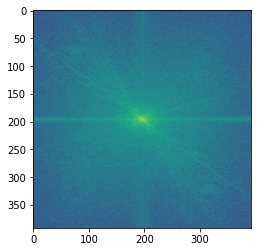

In [100]:
plt.imshow(np.log(np.abs(fftshift(f))))

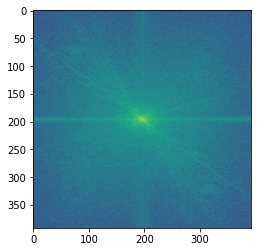

In [101]:
plt.imshow(np.log(np.abs(fftshift(fc))))

### FT symmetry

In [102]:
x = np.dot(mpimg.imread('hand.jpg'),[0.2989, 0.5870, 0.1140])
n1,n2 = x.shape

f0 = fftshift(fft2(x))
m0 = np.abs(f0)
a0 = np.angle(f0)
fc = np.conj(f0)
r0 = np.real(f0)
i0 = np.imag(f0)

xc = ifft2(fc)
xr = ifft2(r0)
xi = ifft2(i0)

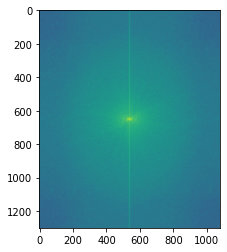

In [103]:
plt.imshow(np.log(m0))

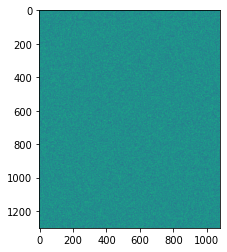

In [104]:
plt.imshow(a0)

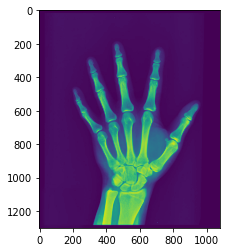

In [105]:
plt.imshow(np.abs(x))

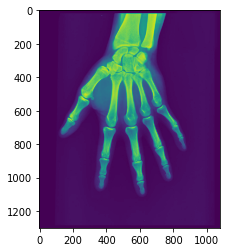

In [106]:
plt.imshow(np.abs(xc))

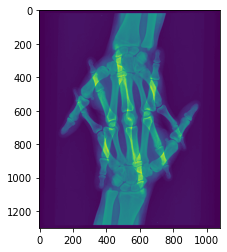

In [107]:
plt.imshow(np.abs(xr))

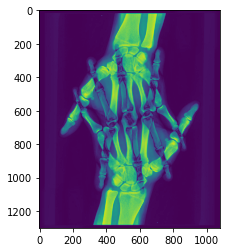

In [108]:
plt.imshow(np.abs(xi))

### FT separability

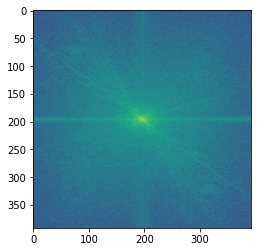

In [109]:
x = np.dot(mpimg.imread('lena.jpg'),[0.2989, 0.5870, 0.1140])
n1,n2 = x.shape

f0 = fftshift(fft2(x))
f1 = fft(x)
f2=fftshift(fft(f1.T).T)

x0 = np.abs(ifft2(f0))
x2 = np.abs(ifft2(f2))

plt.imshow(np.log(np.abs(f0)))

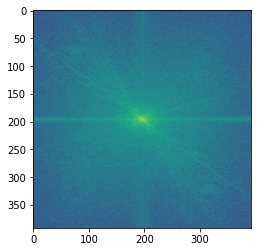

In [110]:
plt.imshow(np.log(np.abs(f2)))

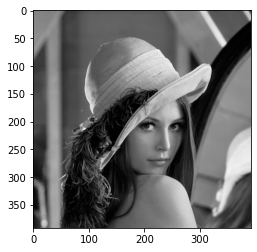

In [111]:
plt.imshow((np.abs(x0)),'Greys_r',vmin=0, vmax=255)

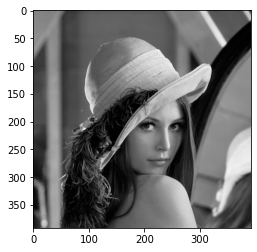

In [112]:
plt.imshow((np.abs(x2)),'Greys_r',vmin=0, vmax=255)

### fft2 Mean

In [113]:
x = np.dot(mpimg.imread('lena.jpg'),[0.2989, 0.5870, 0.1140])
n1,n2 = x.shape
f=fft2(x)
print('image intensity values mean')
print(np.mean(x[:]))
print('image Ft (0,0) value')
print(f[0,0]/n1/n2)

image intensity values mean
84.80015646084964
image Ft (0,0) value
(84.80015646084964+0j)


### Submean

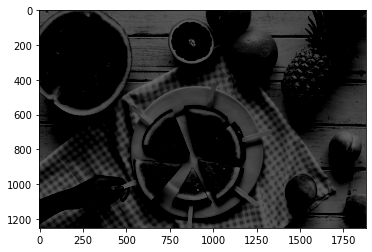

In [114]:
x = np.dot(mpimg.imread('redfruits.jpg'),[0.2989, 0.5870, 0.1140])
n1,n2 = x.shape
xm = np.mean(x[:])
y = x-xm
plt.imshow(y,'Greys_r',vmin=0, vmax=255)

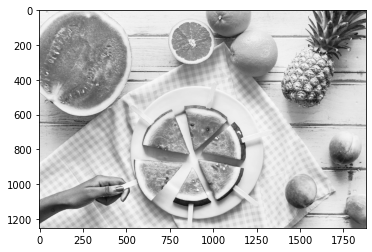

In [115]:
f = fftshift(fft2(x))
g = f
g[int(n1/2)+1,int(n2/2)+1]=0
z = ifft2(g)
plt.imshow(np.abs(z),'Greys_r',vmin=0, vmax=255)

### FT phase

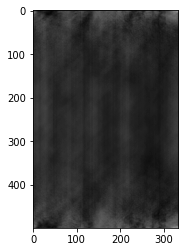

In [116]:
x1 = np.dot(mpimg.imread('deer.jpg')[:500,:334],[0.2989, 0.5870, 0.1140])
x2 = np.dot(mpimg.imread('monkey.jpg'),[0.2989, 0.5870, 0.1140])

f1 = fft2(x1)
m1 = np.abs(f1)
a1 = np.angle(f1)

f2 = fft(x2)
m2 = np.abs(x2)
a2 = np.angle(f2)

y1 = np.multiply(m1,np.exp(1j*a2))
y2 = np.multiply(m2,np.exp(1j*a1))

z1 = ifft2(y1)
z2 = ifft2(y2)


plt.imshow(np.abs(z1),'Greys_r')

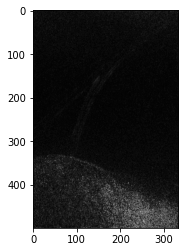

In [117]:
plt.imshow(np.abs(z2),'Greys_r')